# Analyse de sous-espaces de bases d'images

Notebook adapté de J. Vanderplas. (Data Science Handbook https://github.com/jakevdp/PythonDataScienceHandbook). 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn

## Analyse d'une base de visages

La base est décrite sur :
http://vis-www.cs.umass.edu/lfw/lfw.pdf

Chargement de la base de visages

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40) # on ne prend que certaines images
print(faces.target_names)
print(faces.images.shape) # nombre d'images, dimension lignes x colonnes des images


['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
(1867, 62, 47)


### Visualisation des visages propres

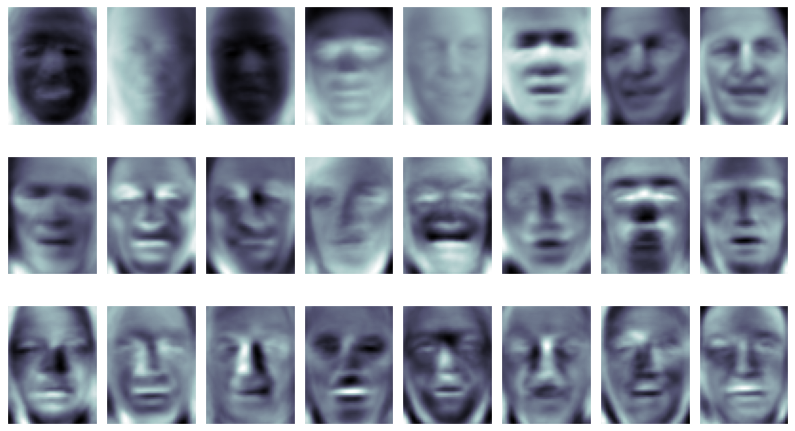

In [4]:
from sklearn.decomposition import PCA

nb_composantes_dans_sous_espace_principal = 150  # on choisit combien de dimensions conserver
# RandomizedPCA est une fonction permettant de calculer une ACP approximative à coût faible
pca = PCA(nb_composantes_dans_sous_espace_principal) 

pca.fit(faces.data)
fig, axes = plt.subplots(3, 8, figsize=(14, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Q : Quelle est la dimension de l'espace avant l'ACP ? Comment interpréter ces images ? Sont-elles orthogonales les unes aux autres ? Comment sont-elles corrélées les unes aux autres ?

R : 

## Observation de la "variance expliquée"

On affiche ici la proportion (entre 0 et 1) de la variance expliquée, en fonction du nombre de composantes qu'on alloue à notre sous-espace propre

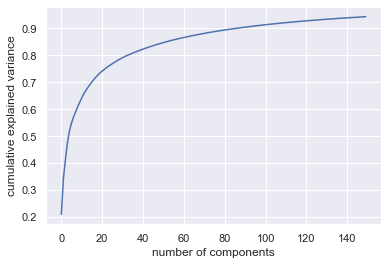

In [4]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Q : quelle caractéristique de l'ACP montre cette courbe ?

R: 

## Reconstruction approximative des visages dans le sous-espace propre

In [26]:
# Projection

nb_composantes_dans_sous_espace_principal = 150 # essayer moins, essayer plus

pca = PCA(nb_composantes_dans_sous_espace_principal).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

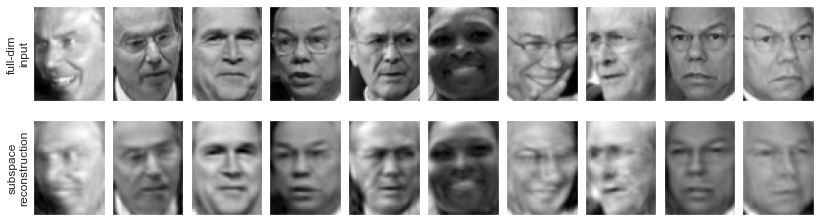

In [27]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(14, 4),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('subspace\nreconstruction');

Q : A partir de combien de composantes (à peu près) la reconstruction est-elle visuellement acceptable  ? 
Si on utilisait cette technique pour la compression d'images, quel serait le taux de compression ?

R : 

## Décomposer une image "non visage" sur la base de visages

on prend par exemple les images camera et coins, fournies dans par librairie skimage

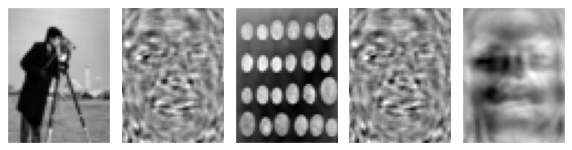

In [28]:
from skimage import data,transform

camera = data.camera()
camera_resized = transform.resize(camera,(62,47))
# attention ci-dessous pca contient les résultats de l'ACP sur des visages
camera_components=pca.transform(camera_resized.reshape(1,62*47)) 
camera_reconstruction = pca.inverse_transform(camera_components)

coins = data.coins()
coins_resized = transform.resize(coins,(62,47))
coins_components=pca.transform(coins_resized.reshape(1,62*47))
coins_reconstruction = pca.inverse_transform(coins_components)
fig, ax = plt.subplots(1, 5, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
ax[0].imshow(camera_resized, cmap='binary_r')
ax[1].imshow(camera_reconstruction.reshape(62, 47), cmap='binary_r')
ax[2].imshow(coins_resized, cmap='binary_r')
ax[3].imshow(coins_reconstruction.reshape(62, 47), cmap='binary_r')
# par curiosité, la différence entre les deux images reconstruites (pour vérifier qu'elles sont bien différentes !)
ax[4].imshow((camera_reconstruction-coins_reconstruction).reshape(62, 47), cmap='binary_r')

Q : que nous confirment ces résultats  ?

R : 

## Visualiser en dimension 2 des données en haute dimension

Q : Est-ce que, dans le cas de la base de visages, réduire l'espace aux deux premières composantes principales semble suffir à caractériser la personne ?

R : 

Pour visualiser les données dans le sous-espace principal, on va plutôt utiliser des images de chiffres manuscrits (dimension 8x8), qui sont plus simples.

In [29]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()
digits.data.shape # affiche le nombre d'images et la dimension des vecteurs (64 = 8x8)

(1797, 64)

Visualisons quelques exemples de données de la base de chiffres

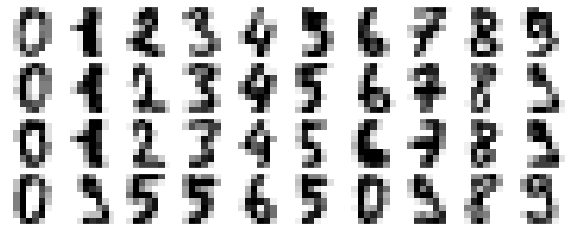

In [30]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [31]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape) # Images-vecteurs avant projection
print(projected.shape) # Images-vecteurs après projection

(1797, 64)
(1797, 2)


Q: Ci-dessous, les positions des images (représentées par des vecteurs) dans le sous-espace propre. Les couleurs distinguent les 10 chiffres. Quelles perspectives donnent ce résultat ?

R : 

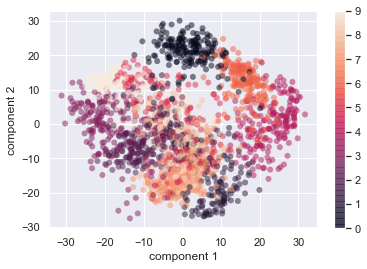

In [32]:
plt.scatter(projected[:, 0], projected[:, 1],c=digits.target, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Projection non-linéaire

Q : l'analyse en composantes principales suppose t-elle une combinaison linéaire ou non linéaire des variables initiales ? Quelle est la conséquence sur la géométrie du sous-espace recherché ? L'identification du sous-espace propre utilise t-elle directement toutes les données, ou passe t-elle complètementpar l'intermédiaire de la matrice de covariance (qui, elle, utilise toutes les données) ?

R :

On va regarder ici ce qu'on peut obtenir avec des combinaisons non linéaires, par la méthode Isomap (pas détaillée ici), sur la base de visages, puis sur une base de chiffres manuscrits un peu plus riche que la base de chiffres précédente. L'objectif ici est de voir si cette méthode est capable de projeter les images d'une haute dimension vers la dimension 2, en préservant la similarité (deux images visuellement similaires doivent se trouver proches l'une de l'autre dans le sous-espace)

In [33]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)

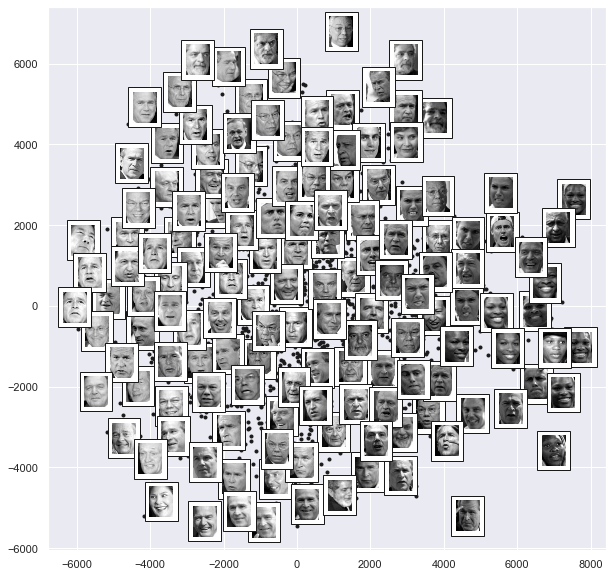

In [34]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

            
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

Q : quel commentaire (optimiste ou pas) peut-on tirer de ce résultat ?

R : 

In [35]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',data_home='datasets')

In [36]:
print (mnist.target)

['5' '0' '4' ... '4' '5' '6']


Visualisation de quelques exemples de la base 

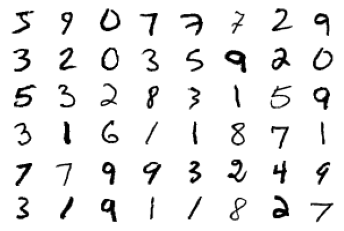

In [37]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

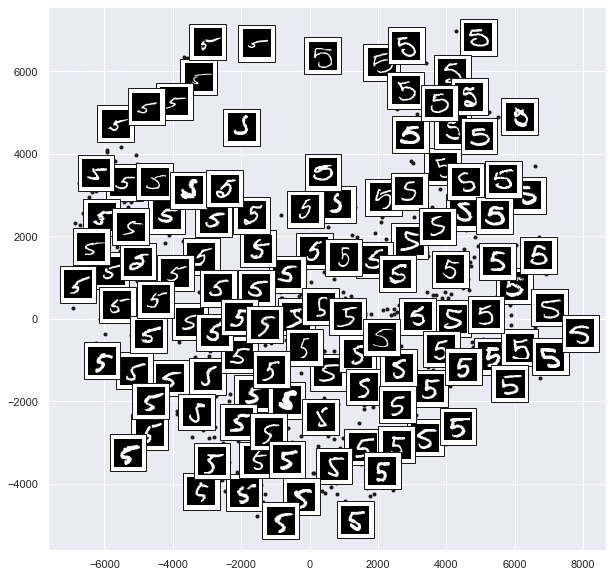

In [38]:
from sklearn.manifold import Isomap

chiffre_choisi='5'  # ici le chiffre dont on veut afficher les images  

data = mnist.data[mnist.target ==chiffre_choisi ][::8]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)), ax=ax, thumb_frac=0.05)

Q : Expérimenter avec divers chiffres. Modifier le code pour que l'algorithme traite l'union de plusieurs chiffres (la figure devra alors afficher plusieurs chiffres simultanément - quel est l'intérêt de le voir ?)

R : 